In [1]:
import numpy as np
import pandas as pd

In [2]:
df3 = pd.read_csv("delhi_cases.csv",parse_dates=["Date"])

In [3]:
df3.head()

,Unnamed: 0,index,Sno,Date_,Time,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 12,Eight,Ten,Twelve,Fourteen,Sixteen
0,0,34,35,03-02-2020 00:00,6:00 PM,2020-02-03,Delhi,1,0,0,0,1,NaN,0.0,0.0,1.0,1.0,1.0
1,1,38,39,03-03-2020 00:00,6:00 PM,2020-03-03,Delhi,1,0,0,0,1,NaN,0.0,0.0,1.0,1.0,1.0
2,2,42,43,03-04-2020 00:00,6:00 PM,2020-04-03,Delhi,1,0,0,0,1,NaN,0.0,1.0,1.0,1.0,1.0
3,3,45,46,03-05-2020 00:00,6:00 PM,2020-05-03,Delhi,2,0,0,0,2,NaN,0.0,1.0,1.0,1.0,1.0
4,4,51,52,03-06-2020 00:00,6:00 PM,2020-06-03,Delhi,3,0,0,0,3,NaN,1.0,1.0,1.0,1.0,1.0


In [4]:
corr_twelve_df = pd.DataFrame(df3, columns=['Date','Confirmed','Twelve'])

In [5]:
corr_twelve_df.head()

,Date,Confirmed,Twelve
0,2020-02-03,1,1.0
1,2020-03-03,1,1.0
2,2020-04-03,1,1.0
3,2020-05-03,2,1.0
4,2020-06-03,3,1.0


In [6]:
corr_twelve_df["Confirmed"]=corr_twelve_df["Confirmed"].astype("float64")

In [7]:
df_droppednan_12 = corr_twelve_df.dropna()

In [8]:
import scipy.stats as stats
import scipy.stats

In [10]:
pearsonr_x = df_droppednan_12["Confirmed"]
pearsonr_y = df_droppednan_12["Twelve"]

In [11]:
scipy.stats.pearsonr(pearsonr_x, pearsonr_y)

(0.9689234110081295, 7.206841384129558e-76)

In [12]:
scipy.stats.spearmanr(pearsonr_x, pearsonr_y)

SpearmanrResult(correlation=0.9990569313876526, pvalue=4.526359129258764e-168)

In [13]:
scipy.stats.kendalltau(pearsonr_x, pearsonr_y) 

KendalltauResult(correlation=0.9914872787562796, pvalue=6.351348387833806e-59)

In [14]:
result = scipy.stats.linregress(pearsonr_x, pearsonr_y)
result.slope

0.04523372813799667

In [15]:
result.intercept

64.83935692239777

In [16]:
result.rvalue

0.9689234110081295

In [17]:
result.pvalue

7.20684138412935e-76

In [18]:
result.stderr

0.0010455001566473067

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
line = f'Regression line: y={result.intercept:.2f}+{result.slope:.2f}x, r={result.rvalue:.2f}'

In [21]:
line

'Regression line: y=64.84+0.05x, r=0.97'

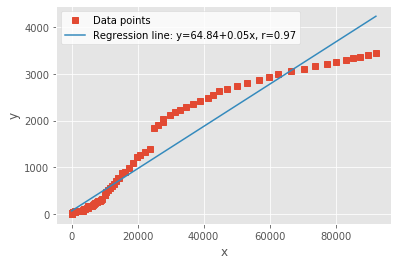

In [22]:
fig, ax = plt.subplots()
ax.plot(pearsonr_x, pearsonr_y, linewidth=0, marker='s', label='Data points')
ax.plot(pearsonr_x, result.intercept + result.slope * pearsonr_x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()